In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
loaded = np.load('distances.npz')
list_of_distances = [loaded[key] for key in loaded]
all_distances = np.concatenate(list_of_distances)

In [26]:
len(all_distances)

76695

In [22]:
df = pd.read_csv("report_run24.csv")
df.head()

,layer,points,mean,std,min,max,used
0,central_points,2673,1.837386e-06,0.000055,0.0,0.002281,0
1,central_points,824,9.327541e-07,0.000016,0.0,0.000349,0
2,central_points,2584,9.825151e-06,0.000226,0.0,0.006107,1
3,central_points,1852,4.134429e-06,0.000070,0.0,0.001774,1
4,central_points,238,1.271421e-05,0.000124,0.0,0.001653,1


In [23]:
df.describe()

,points,mean,std,min,max,used
count,159.000000,1.590000e+02,159.000000,159.0,159.000000,159.000000
mean,482.358491,9.954690e-04,0.002570,0.0,0.014431,0.232704
std,1250.145684,1.857592e-03,0.003776,0.0,0.017723,0.423890
min,10.000000,2.227442e-07,0.000010,0.0,0.000246,0.000000
25%,38.500000,2.992744e-05,0.000235,0.0,0.002419,0.000000
50%,101.000000,3.899530e-04,0.001316,0.0,0.007913,0.000000
75%,334.500000,1.127180e-03,0.003091,0.0,0.020609,0.000000
max,10764.000000,1.617479e-02,0.028198,0.0,0.102748,1.000000


In [7]:
df['max'].max()

np.float64(0.1027484978198731)

<Axes: xlabel='mean', ylabel='Count'>

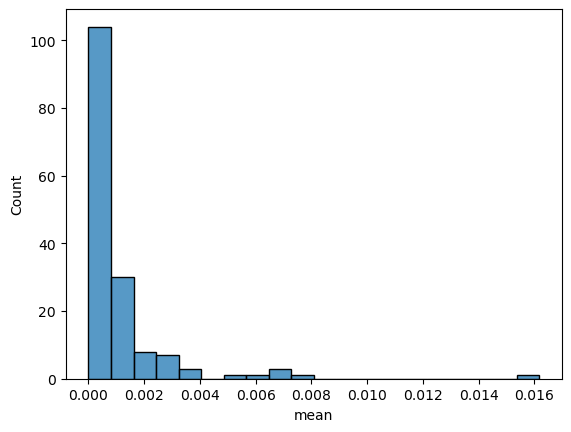

In [24]:
sns.histplot(df['mean'], bins=20)

<Axes: xlabel='std', ylabel='Count'>

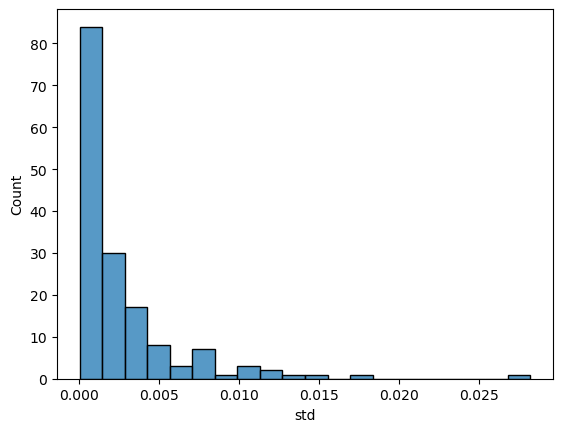

In [25]:
sns.histplot(df['std'], bins=20)

<Axes: xlabel='max', ylabel='Count'>

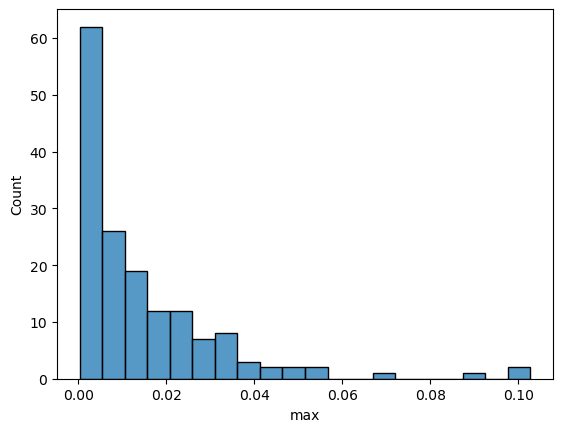

In [27]:
sns.histplot(df['max'], bins=20)

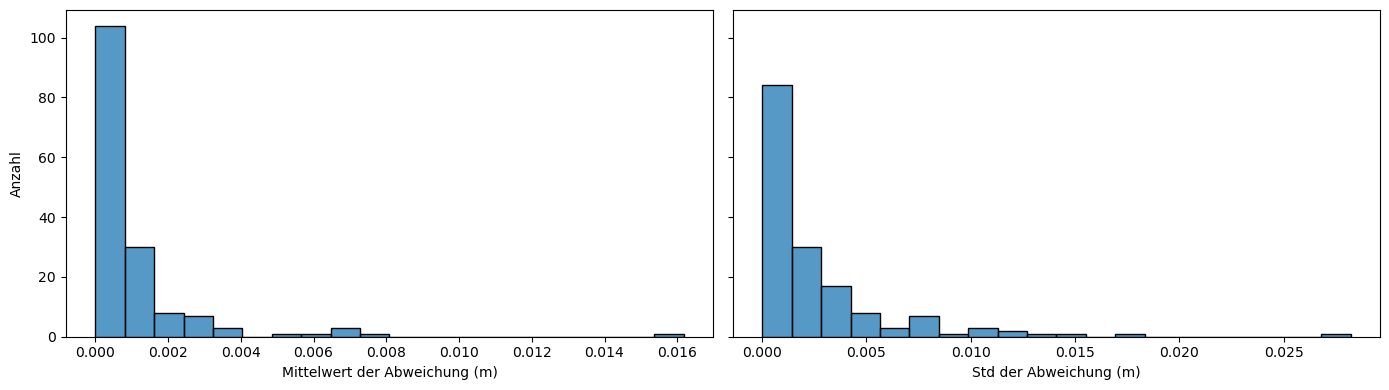

In [41]:
fig, ax = plt.subplots(1,2, figsize=(14, 4), sharey='row')
sns.histplot(df['mean'], bins=20, ax=ax[0])
ax[0].set_xlabel('Mittelwert der Abweichung (m)')
ax[0].set_ylabel('Anzahl')
sns.histplot(df['std'], bins=20, ax=ax[1])
ax[1].set_xlabel('Std der Abweichung (m)')
ax[1].set_ylabel('Anzahl')
fig.tight_layout()

fig.savefig('report_run24_linestrings.png', dpi=300)

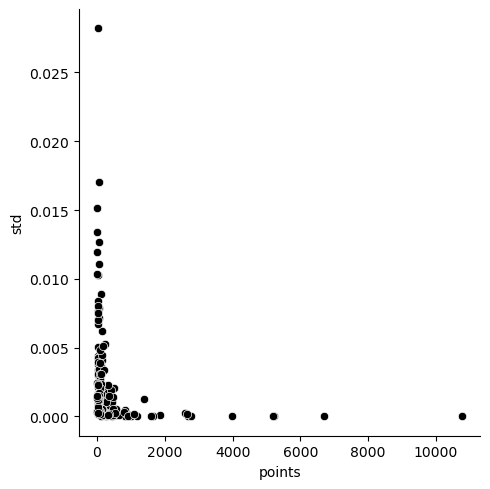

In [56]:
sns.relplot(x='points', y='std', data=df, color='black')

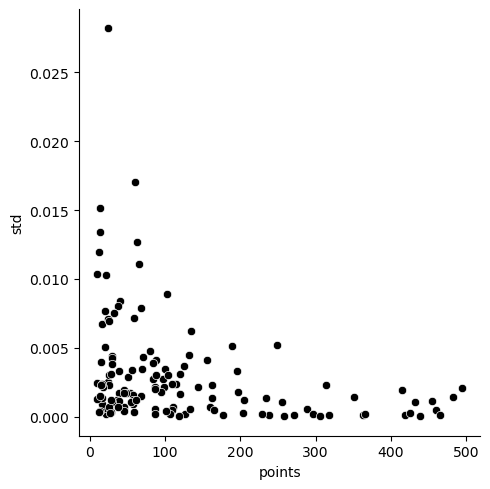

In [57]:
sns.relplot(x='points', y='std', data=df[df['points'] < 500], color='black')

In [46]:
df['mean'].quantile(0.9)

np.float64(0.0025649435389509803)

In [51]:
df['std'].quantile(0.9)

np.float64(0.007089270333078702)

In [48]:
df['std'].quantile(0.8)

np.float64(0.0038361555520351406)

In [52]:
colors = sns.color_palette()

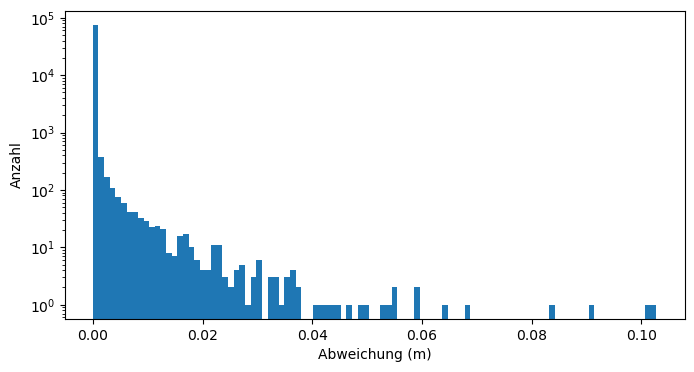

In [53]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.hist(all_distances, bins=100, color=colors[0]);
ax.set_yscale('log')
ax.set_xlabel('Abweichung (m)')
ax.set_ylabel('Anzahl')
fig.savefig('report_run24_disthist.png', dpi=300)

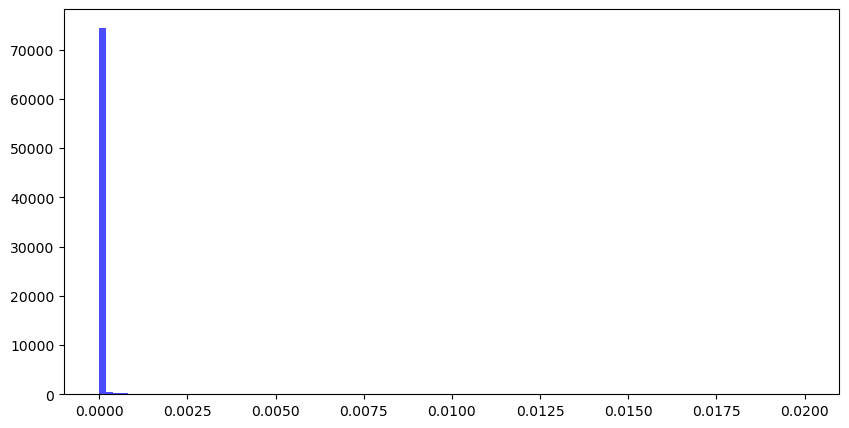

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(all_distances[all_distances < 0.02], bins=100, color='blue', alpha=0.7);

In [16]:
np.percentile(all_distances, 99.9)

np.float64(0.021898194234058945)

In [20]:
np.percentile(all_distances, 99)

np.float64(0.00211606550227006)

In [21]:
np.percentile(all_distances, 99.5)

np.float64(0.00593484635158756)

In [49]:
all_distances.max()

np.float64(0.10274849781987314)

In [50]:
all_distances.mean()

np.float64(0.0001138489030781465)

In [55]:
längen = np.array([len(x) for x in list_of_distances])
längen.mean(), längen.std(), längen.max(), längen.min()

(np.float64(482.35849056603774),
 np.float64(1246.2082075807984),
 np.int64(10764),
 np.int64(10))